In [1]:
%cd OSDA_course/lazy_fca
import lazy_pipeline as lpipe
import numpy as np
import pandas as pd 
df = pd.read_csv("/Users/aldargarmaev/Documents/GitHub/lazyFCA/horse.csv")
df.head()


/Users/aldargarmaev/Documents/GitHub/lazyFCA/OSDA_course/lazy_fca


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

# Adjusting Visual Styles
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.3)

# Ensure visualizations are displayed inline
%matplotlib inline


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['surgery'] = le.fit_transform(df['surgery'])
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,0,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,1,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,1,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [5]:
X = df.drop('surgery', axis=1)  # Features
y = df['surgery']  # Target variable

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    299 non-null    object 
 1   hospital_number        299 non-null    int64  
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  nasogastric_tube       195 non-null    object 
 13  nasogastric_reflux     193 non-null    object 
 14  nasogastric_reflux_ph  53 non-null     float64
 15  rectal

In [7]:
# Specify the number of bins
for column in X.select_dtypes(include=['int64','float64']).columns:
    X[column] = pd.cut(X[column], bins=3, labels=False)

# Perform one-hot encoding for categorical columns
X = pd.get_dummies(X)

In [8]:
X = lpipe.binarize_X(X)
X

,hospital_number: 0,hospital_number: 2,rectal_temp: 0.0,rectal_temp: 1.0,rectal_temp: 2.0,pulse: 0.0,pulse: 1.0,pulse: 2.0,respiratory_rate: 0.0,respiratory_rate: 1.0,...,outcome_lived: 0,outcome_lived: 1,surgical_lesion_no: 0,surgical_lesion_no: 1,surgical_lesion_yes: 0,surgical_lesion_yes: 1,cp_data_no: 0,cp_data_no: 1,cp_data_yes: 0,cp_data_yes: 1
0,True,False,False,True,False,True,False,False,True,False,...,True,False,False,True,True,False,False,True,True,False
1,True,False,False,False,True,False,True,False,True,False,...,True,False,False,True,True,False,False,True,True,False
2,True,False,False,True,False,True,False,False,True,False,...,False,True,False,True,True,False,True,False,False,True
3,False,True,False,False,True,False,False,True,False,False,...,True,False,True,False,False,True,True,False,False,True
4,True,False,False,True,False,False,True,False,True,False,...,True,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,True,False,False,False,False,False,True,False,False,False,...,True,False,False,True,True,False,False,True,True,False
295,True,False,False,True,False,True,False,False,True,False,...,True,False,True,False,False,True,True,False,False,True
296,True,False,False,True,False,True,False,False,True,False,...,True,False,True,False,False,True,False,True,True,False
297,True,False,True,False,False,False,True,False,True,False,...,False,True,True,False,False,True,True,False,False,True


In [9]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'abdomen_distend_large: 1',
 'abdomen_distend_small: 0',
 'abdomen_firm: 0',
 'abdomen_normal: 0',
 'abdomen_other: 0',
 'abdominal_distention_moderate: 0',
 'abdominal_distention_none: 0',
 'abdominal_distention_severe: 1',
 'abdominal_distention_slight: 0',
 'abdomo_appearance_clear: 0',
 'abdomo_appearance_cloudy: 0',
 'abdomo_appearance_serosanguious: 0',
 'age_adult: 1',
 'age_young: 0',
 'capillary_refill_time_3: 0',
 'capillary_refill_time_less_3_sec: 0',
 'capillary_refill_time_more_3_sec: 1',
 'cp_data_no: 1',
 'cp_data_yes: 0',
 'hospital_number: 0',
 'lesion_1: 0',
 'lesion_2: 0',
 'lesion_3: 0',
 'mucous_membrane_bright_pink: 0',
 'mucous_membrane_bright_red: 0',
 'mucous_membrane_dark_cyanotic: 0',
 'mucous_membrane_normal_pink: 0',
 'mucous_membrane_pale_cyanotic: 0',
 'mucous_membrane_pale_pink: 0',
 'nasogastric_reflux_less_1_liter: 0',
 'nasogastric_reflux_more_1_liter: 0',
 'nasogastric_reflux_none: 0',
 'nasogastric_tube_none: 0',
 'nasogastric_tube_significant: 0',

In [10]:
y = y.values.tolist()

In [11]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(29, 270)

In [12]:
y_test = y[n_train:]

In [13]:
%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


Predicting step by step: 100%|██████████| 299/299 [00:05<00:00, 47.02it/s] 


In [14]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 299/299 [00:00<00:00, 1497.50it/s]

CPU times: user 181 ms, sys: 2.72 ms, total: 184 ms
Wall time: 183 ms


In [15]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

/Users/aldargarmaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/aldargarmaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/aldargarmaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(

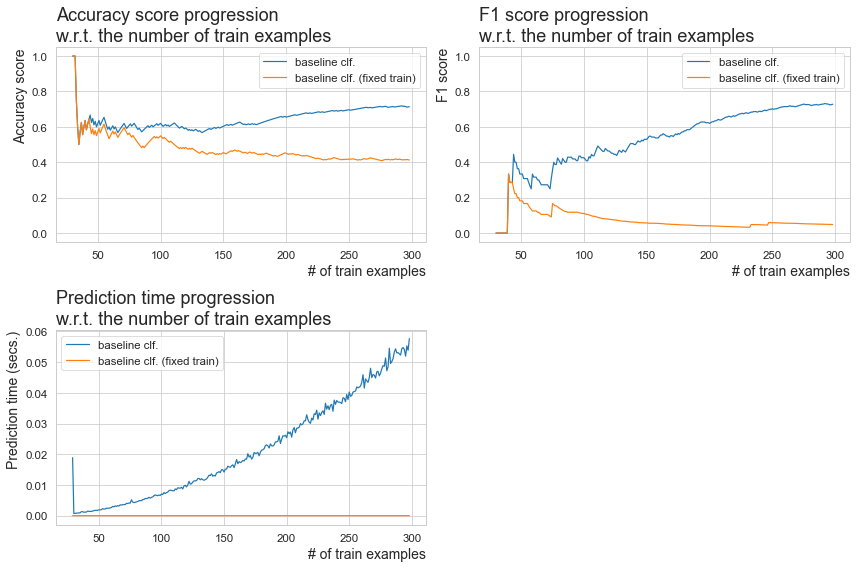

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [17]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

64.44766143941277

In [18]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

52.748454360535966

In [19]:
n_train = int(len(X)*0.9)
n_test = len(X) - n_train
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

from sklearn import metrics

print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy : 76.66666666666667
F1 : 82.05128205128204


In [21]:
from sklearn import tree
DF = tree.DecisionTreeClassifier(max_depth=3,random_state=42)
DF = DF.fit(X_train, y_train)
y_pred = DF.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy : 73.33333333333333
F1 : 78.94736842105262


In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy : 76.66666666666667
F1 : 82.05128205128204


In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred) * 100}')
print(f'F1 : {f1_score(y_test, y_pred) * 100}')

Accuracy : 40.0
F1 : 18.181818181818183
